In [1]:
# !pip install pycaret

In [2]:
import pandas as pd
import seaborn as sns

from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train_without_outliers_v2.csv")

In [4]:
train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
2,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
3,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2
4,2013,1,industrial,5,APVF78863215212358,Installation_zone 2


In [5]:
train['mean_consumption'] = train.groupby('Consumer_number')['Consumption'].transform('mean')
train['consumption_count'] = train.groupby('Consumer_number')['Consumption'].transform('count')
train = train.drop('Consumer_number', axis=1)

In [6]:
train.head()

,Year,Month,Consumer_type,Consumption,Installation_zone,mean_consumption,consumption_count
0,2013,1,domestic,0,Installation_zone 1,4.227273,22
1,2013,1,domestic,6,Installation_zone 2,2.724138,29
2,2013,1,domestic,1,Installation_zone 2,1.500000,26
3,2013,1,domestic,13,Installation_zone 2,10.000000,28
4,2013,1,industrial,5,Installation_zone 2,2.000000,22


In [7]:
counts = train['Consumer_type'].value_counts()
print(counts)

domestic               203909
rural domestic          44079
industrial              17012
rural commercial         3943
construction             1292
rural expansion           721
low income families       511
Name: Consumer_type, dtype: int64


In [8]:
# train, test = train_test_split(train, test_size=0.1, stratify=train['Consumer_type'], random_state=42)

test2 = pd.read_csv("test_v3.csv")
test2['mean_consumption'] = test2.groupby('Consumer_number')['Consumption'].transform('mean')
test2['consumption_count'] = test2.groupby('Consumer_number')['Consumption'].transform('count')
test2 = test2.drop('Consumer_number', axis=1)

In [9]:
train = train.sample(frac=1, random_state=42).reset_index(drop=True)
# test = test.sample(frac=1, random_state=42).reset_index(drop=True)
test2 = test2.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
train.shape

(271467, 7)

In [11]:
counts = train['Consumer_type'].value_counts()
print(counts)

domestic               203909
rural domestic          44079
industrial              17012
rural commercial         3943
construction             1292
rural expansion           721
low income families       511
Name: Consumer_type, dtype: int64


In [12]:
# test.shape

In [13]:
# counts = test['Consumer_type'].value_counts()
# print(counts)

In [14]:
# clf1 = setup(train, target='Consumer_type', use_gpu=True)
clf1 = setup(train, target='Consumer_type')

best_model = compare_models()

,Description,Value
0,Session id,7077
1,Target,Consumer_type
2,Target type,Multiclass
3,Target mapping,"construction: 0, domestic: 1, industrial: 2, low income families: 3, rural commercial: 4, rural domestic: 5, rural expansion: 6"
4,Original data shape,"(271467, 7)"
5,Transformed data shape,"(271467, 7)"
6,Transformed train set shape,"(190026, 7)"
7,Transformed test set shape,"(81441, 7)"
8,Numeric features,5
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9691,0.9635,0.9691,0.9691,0.9691,0.9237,0.9237,3.3710
rf,Random Forest Classifier,0.9429,0.9871,0.9429,0.9389,0.9328,0.8472,0.8540,11.4750
catboost,CatBoost Classifier,0.9338,0.9706,0.9338,0.9305,0.9171,0.8184,0.8302,256.3520
gbc,Gradient Boosting Classifier,0.9252,0.9479,0.9252,0.9189,0.9020,0.7916,0.8076,102.9780
et,Extra Trees Classifier,0.9219,0.9633,0.9219,0.9054,0.9067,0.7897,0.7972,20.0180
lightgbm,Light Gradient Boosting Machine,0.9210,0.9527,0.9210,0.9123,0.9068,0.7881,0.7960,586.1220
lr,Logistic Regression,0.9148,0.8828,0.9148,0.9042,0.8758,0.7558,0.7798,62.3390
lda,Linear Discriminant Analysis,0.9146,0.8714,0.9146,0.8957,0.8753,0.7554,0.7792,8.9860
ridge,Ridge Classifier,0.9137,0.0000,0.9137,0.8978,0.8730,0.7522,0.7766,2.2090
qda,Quadratic Discriminant Analysis,0.9122,0.8820,0.9122,0.8805,0.8835,0.7548,0.7703,1.8200


In [15]:
# result_best_model = predict_model(best_model, data=test)

In [16]:
# result_best_model.shape

In [17]:
# result_best_model.head()

In [18]:
# matrix = confusion_matrix(result_best_model['Consumer_type'], result_best_model['prediction_label'])
# sns.heatmap(matrix, annot=True)

In [19]:
result_best_model = predict_model(best_model, data=test2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.4191,0.6616,0.4191,0.5604,0.3544,0.3223,0.3675


In [20]:
result_best_model.shape

(3500, 9)

In [21]:
result_best_model.head()

,Year,Month,Consumption,Installation_zone,mean_consumption,consumption_count,Consumer_type,prediction_label,prediction_score
0,2013,3,1,Installation_zone 2,0.500000,2,industrial,domestic,1.0
1,2017,7,10,Installation_zone 4,25.818182,11,construction,domestic,1.0
2,2018,8,4,Installation_zone 3,4.363636,11,low income families,low income families,1.0
3,2013,1,15,Installation_zone 1,15.000000,1,domestic,domestic,1.0
4,2013,1,4,Installation_zone 2,4.000000,1,domestic,domestic,1.0


<AxesSubplot: >

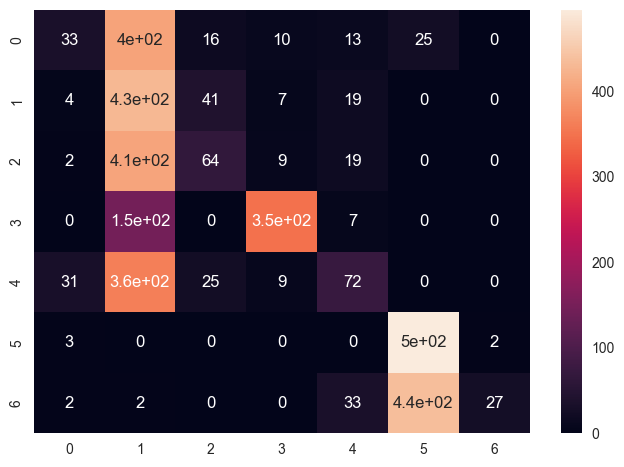

In [22]:
matrix = confusion_matrix(result_best_model['Consumer_type'], result_best_model['prediction_label'])
sns.heatmap(matrix, annot=True)

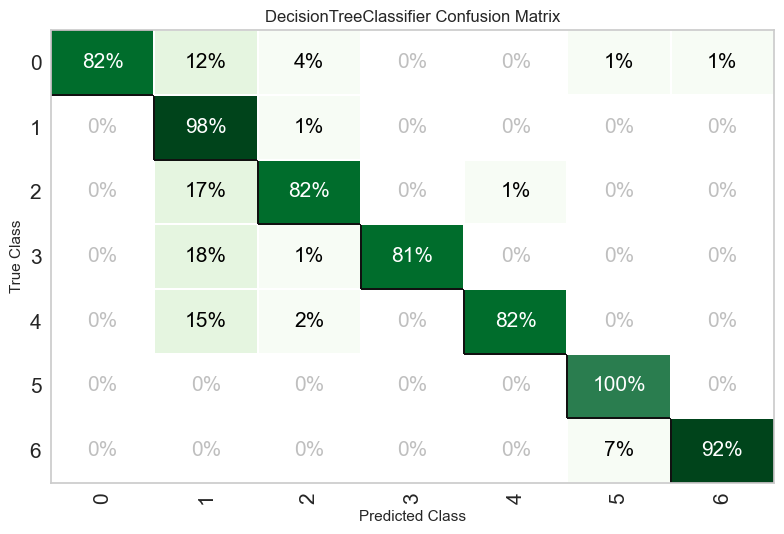

In [23]:
plot_model(best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [24]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9216,0.9386,0.9216,0.9131,0.8934,0.7790,0.7982
1,0.9209,0.9357,0.9209,0.9174,0.8904,0.7754,0.7967
2,0.9217,0.9367,0.9217,0.9153,0.8932,0.7788,0.7984
3,0.9215,0.9391,0.9215,0.9182,0.8915,0.7774,0.7981
4,0.9219,0.9388,0.9219,0.9138,0.8940,0.7795,0.7986
5,0.9230,0.9399,0.9230,0.9135,0.8972,0.7840,0.8014
6,0.9217,0.9366,0.9217,0.9144,0.8937,0.7789,0.7985
7,0.9221,0.9379,0.9221,0.9151,0.8940,0.7799,0.7993
8,0.9216,0.9366,0.9216,0.9133,0.8935,0.7788,0.7980


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


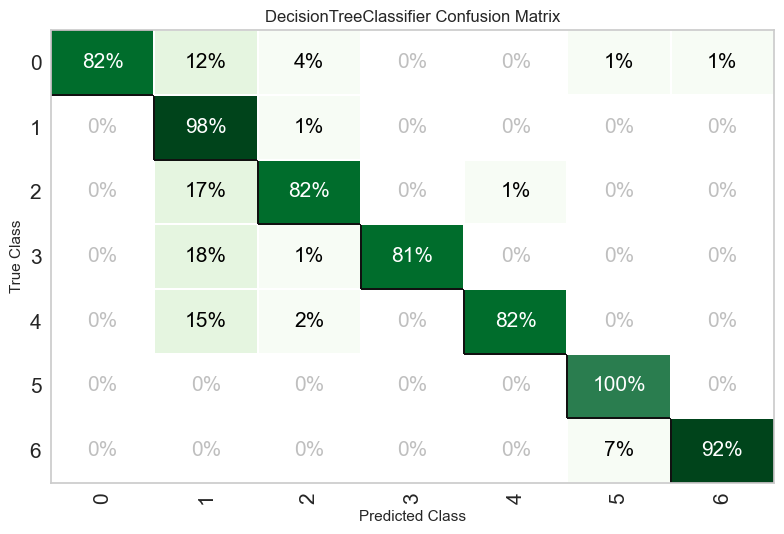

In [25]:
plot_model(tuned_best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [26]:
# result_tuned_best_model = predict_model(tuned_best_model, data=test)

In [27]:
# matrix = confusion_matrix(result_tuned_best_model['Consumer_type'], result_tuned_best_model['prediction_label'])
# sns.heatmap(matrix, annot=True)

In [28]:
result_tuned_best_model = predict_model(tuned_best_model, data=test2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.4191,0.6616,0.4191,0.5604,0.3544,0.3223,0.3675


<AxesSubplot: >

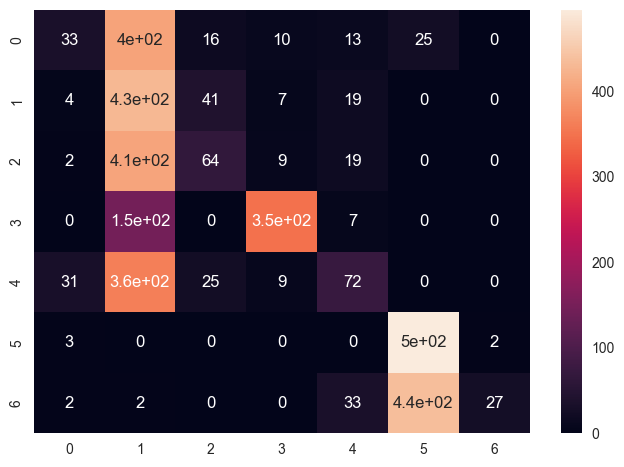

In [29]:
matrix = confusion_matrix(result_tuned_best_model['Consumer_type'], result_tuned_best_model['prediction_label'])
sns.heatmap(matrix, annot=True)

In [30]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
# save_model(best_model, 'best_model')
# save_model(tuned_best_model, 'tuned_best_model')

In [33]:
competition = pd.read_csv("competition.csv")

In [34]:
competition.head()

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3


In [35]:
competition['mean_consumption'] = competition.groupby('Consumer_number')['Consumption'].transform('mean')
competition['consumption_count'] = competition.groupby('Consumer_number')['Consumption'].transform('count')

consumer_number = competition['Consumer_number']
competition = competition.drop('Consumer_number', axis=1)

In [36]:
competition.head()

,Year,Month,Consumption,Installation_zone,mean_consumption,consumption_count
0,2013,1,1,Installation_zone 1,1.250000,4
1,2013,1,2,Installation_zone 1,1.695652,23
2,2013,1,1,Installation_zone 1,3.000000,8
3,2013,1,5,Installation_zone 3,2.750000,8
4,2013,1,14,Installation_zone 3,11.761905,21


In [37]:
result_competition = predict_model(tuned_best_model, data=competition)

result_competition = result_competition.rename(columns={'prediction_label': 'Consumer_type'})

result_competition = result_competition.drop('consumption_count', axis=1)
result_competition = result_competition.drop('mean_consumption', axis=1)
result_competition = result_competition.drop('prediction_score', axis=1)

result_competition['Consumer_number'] = consumer_number

In [38]:
result_competition.head()

,Year,Month,Consumption,Installation_zone,Consumer_type,Consumer_number
0,2013,1,1,Installation_zone 1,industrial,VENX08444954462680
1,2013,1,2,Installation_zone 1,domestic,GRXC33020746550125
2,2013,1,1,Installation_zone 1,domestic,FCGQ19814303536339
3,2013,1,5,Installation_zone 3,domestic,EQKL85694875580467
4,2013,1,14,Installation_zone 3,domestic,KCXW91343862250032


Text(0.5, 1.0, 'Count of Consumer_type')

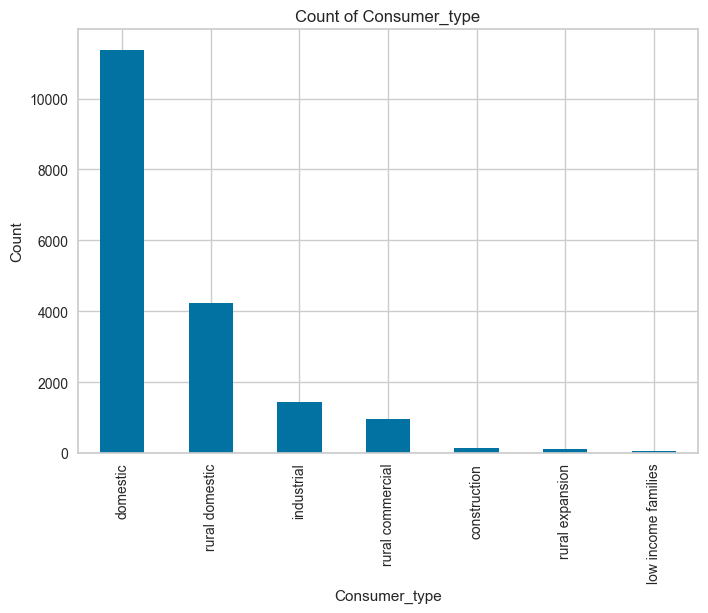

In [39]:
result_competition['Consumer_type'].value_counts().plot(kind='bar')

plt.xlabel('Consumer_type')
plt.ylabel('Count')
plt.title('Count of Consumer_type')

In [40]:
result_competition.to_csv('competition_v3', index=False)

In [41]:
result_competition = predict_model(tuned_best_model, data=competition)

result_competition = result_competition.rename(columns={'prediction_label': 'Consumer_type'})

result_competition = result_competition.drop('consumption_count', axis=1)
result_competition = result_competition.drop('mean_consumption', axis=1)
result_competition = result_competition.drop('prediction_score', axis=1)

In [42]:
result_competition.head()

,Year,Month,Consumption,Installation_zone,Consumer_type
0,2013,1,1,Installation_zone 1,industrial
1,2013,1,2,Installation_zone 1,domestic
2,2013,1,1,Installation_zone 1,domestic
3,2013,1,5,Installation_zone 3,domestic
4,2013,1,14,Installation_zone 3,domestic


Text(0.5, 1.0, 'Count of Consumer_type')

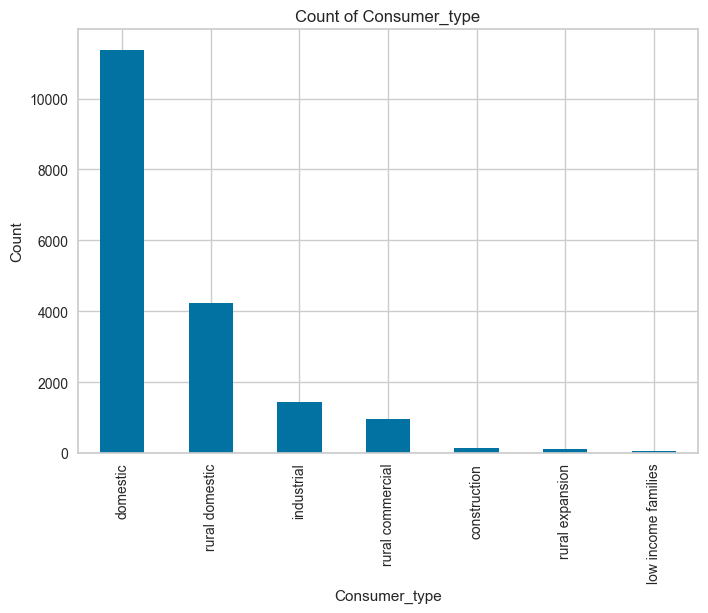

In [43]:
result_competition['Consumer_type'].value_counts().plot(kind='bar')

plt.xlabel('Consumer_type')
plt.ylabel('Count')
plt.title('Count of Consumer_type')